Install dependencies

In [1]:
!pip3 install torch torchvision torchaudio
!pip3 install matplotlib
!pip3 install ultralytics roboflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from ultralytics import YOLO
from pathlib import Path
import os
import json
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:

device = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device} ({'GPU' if device != 'cpu' else 'CPU'})")


Using device: cuda:0 (GPU)


In [4]:

CONFIG = {
    'model': 'yolo11m.pt',  # Choose model size: n, s, m, l, x
    'data': 'datasets/Hardhat-or-Hat.v2-with-hat.yolov11/data.yaml',  
    'epochs': 50,
    'batch': 2 if device != 'cpu' else 4,  # Adjust batch 
    'imgsz': 640,
    'patience': 15,
    'device': device, 
}
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


In [5]:

save_dir = Path('runs/detect')
save_dir.mkdir(parents=True, exist_ok=True)

this_path = os.getcwd()

os.environ['ULTRALYTICS_CONFIG_DIR'] = this_path

data_file = f'{this_path}/{CONFIG['data']}'
with open(data_file, 'r') as f:
    data = yaml.safe_load(f)
    

data['train'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/train/images'
data['val'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/valid/images'
data['test'] = f'{this_path}/{CONFIG['data'].rsplit('/', 1)[0]}/test/images'

with open(data_file, 'w') as f:
    yaml.safe_dump(data, f)


In [6]:

model = YOLO(CONFIG['model'])

In [7]:

results = model.train(
    data=CONFIG['data'],
    epochs=CONFIG['epochs'],
    batch=CONFIG['batch'],
    imgsz=CONFIG['imgsz'],
    patience=CONFIG['patience'],
    device=CONFIG['device'],
    
    verbose=True,
    
    optimizer='SGD',
    lr0=0.001,
    lrf=0.005,
    momentum=0.9,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_bias_lr=0.01,
    warmup_momentum=0.8,
    amp=False,
    
    # Augmentations
    augment=True,
    hsv_h=0.015,  # Image HSV-Hue augmentationc
    hsv_s=0.7,   # Image HSV-Saturation augmentation
    hsv_v=0.4,   # Image HSV-Value augmentation
    degrees=10,  # Image rotation (+/- deg)
    translate=0.1,  # Image translation (+/- fraction)
    scale=0.3,   # Image scale (+/- gain)
    shear=0.0,   # Image shear (+/- deg)
    perspective=0.0,  # Image perspective
    flipud=0.1,  # Image flip up-down
    fliplr=0.1,  # Image flip left-right
    mosaic=1.0,  # Image mosaic
    mixup=0.0,   # Image mixup
    
)


New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=datasets/Hardhat-or-Hat.v2-with-hat.yolov11/data.yaml, epochs=50, time=None, patience=15, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/train/labels.cache... 6970 images, 1 backgrounds, 0 corrupt: 100%|██████████| 6970/6970 [00:00<?, ?it/s]
val: Scanning /var/home/larizmen/DATA/REPOS/ai-apps/dev/hardhat-or-hat/datasets/Hardhat-or-Hat.v2-with-hat.yolov11/valid/labels.cache... 1992 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1992/1992 [00:00<?, ?it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.48G      1.745      2.066      1.505         50        640: 100%|██████████| 3485/3485 [36:29<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [02:14<00:00,  3.70it/s]


                   all       1992      15306      0.576      0.604      0.606      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.5G      1.532      1.207       1.28         22        640: 100%|██████████| 3485/3485 [54:30<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [04:39<00:00,  1.78it/s]

                   all       1992      15306       0.76        0.7      0.743      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.49G      1.486      1.012      1.219        131        640: 100%|██████████| 3485/3485 [1:09:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [04:37<00:00,  1.79it/s]

                   all       1992      15306      0.814      0.761      0.812      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G      1.443     0.9404      1.187          5        640: 100%|██████████| 3485/3485 [1:09:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [02:02<00:00,  4.05it/s]


                   all       1992      15306      0.851       0.77      0.839      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.48G      1.414     0.8847      1.169          5        640: 100%|██████████| 3485/3485 [32:51<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.868      0.786      0.857      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G      1.392     0.8312      1.146         10        640: 100%|██████████| 3485/3485 [32:49<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.855       0.82      0.868      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.49G      1.374     0.8128      1.149         11        640: 100%|██████████| 3485/3485 [32:49<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306       0.88       0.82      0.881      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.34G      1.368     0.8041      1.147         10        640: 100%|██████████| 3485/3485 [32:50<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.874      0.824      0.882       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.32G      1.354      0.782      1.137          5        640: 100%|██████████| 3485/3485 [32:54<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.881      0.836      0.889      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.32G      1.336     0.7553      1.128         11        640: 100%|██████████| 3485/3485 [32:53<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.57it/s]


                   all       1992      15306      0.886      0.828      0.877      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.48G      1.333     0.7494      1.124          3        640: 100%|██████████| 3485/3485 [32:47<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.904      0.828      0.893      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      1.323     0.7311      1.117          6        640: 100%|██████████| 3485/3485 [32:45<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.881      0.844      0.895      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.48G      1.308     0.7249      1.111          8        640: 100%|██████████| 3485/3485 [32:42<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306       0.89      0.833        0.9      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.48G      1.302     0.7112      1.111         14        640: 100%|██████████| 3485/3485 [32:41<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.59it/s]


                   all       1992      15306      0.887      0.844      0.908      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.32G      1.307     0.7012      1.108         37        640: 100%|██████████| 3485/3485 [32:43<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.888      0.859      0.907      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.295     0.6933      1.105         12        640: 100%|██████████| 3485/3485 [32:39<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.59it/s]


                   all       1992      15306      0.908      0.842      0.901      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.292      0.689      1.096         22        640: 100%|██████████| 3485/3485 [32:36<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.61it/s]


                   all       1992      15306      0.912      0.855      0.917      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.48G      1.278     0.6763      1.091         22        640: 100%|██████████| 3485/3485 [32:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.60it/s]


                   all       1992      15306      0.905      0.858      0.913      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.48G      1.279       0.67      1.083         16        640: 100%|██████████| 3485/3485 [32:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.60it/s]


                   all       1992      15306      0.876      0.879      0.913      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.48G      1.265     0.6614      1.084        118        640: 100%|██████████| 3485/3485 [32:34<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.61it/s]


                   all       1992      15306      0.897      0.867      0.912      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G      1.262     0.6586      1.084         92        640: 100%|██████████| 3485/3485 [32:32<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.60it/s]


                   all       1992      15306      0.892      0.862      0.903      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.48G      1.254     0.6542      1.076         69        640: 100%|██████████| 3485/3485 [32:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.60it/s]


                   all       1992      15306      0.887      0.867      0.909      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.48G       1.25     0.6498      1.078         22        640: 100%|██████████| 3485/3485 [32:30<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.61it/s]


                   all       1992      15306      0.885       0.86      0.909      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.48G      1.247     0.6529      1.087          9        640: 100%|██████████| 3485/3485 [32:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.60it/s]


                   all       1992      15306      0.906       0.86      0.915      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G      1.248     0.6361      1.081         42        640: 100%|██████████| 3485/3485 [32:28<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:47<00:00,  4.61it/s]


                   all       1992      15306      0.893      0.869      0.915      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.48G      1.245     0.6445      1.082         14        640: 100%|██████████| 3485/3485 [32:30<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.57it/s]


                   all       1992      15306      0.897      0.856      0.911      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.32G      1.231     0.6335      1.076         44        640: 100%|██████████| 3485/3485 [33:27<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.873       0.85      0.895      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.32G      1.226     0.6257      1.067         11        640: 100%|██████████| 3485/3485 [33:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:52<00:00,  4.42it/s]


                   all       1992      15306      0.882      0.856      0.898      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.48G      1.236     0.6261      1.067         47        640: 100%|██████████| 3485/3485 [33:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:54<00:00,  4.35it/s]


                   all       1992      15306      0.913       0.87       0.92      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.48G      1.222     0.6178       1.07         14        640: 100%|██████████| 3485/3485 [33:17<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:51<00:00,  4.47it/s]


                   all       1992      15306      0.901      0.858      0.909      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.34G       1.23     0.6147      1.066         17        640: 100%|██████████| 3485/3485 [34:19<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.51it/s]


                   all       1992      15306      0.892      0.866      0.916      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.48G      1.218     0.6164      1.064         10        640: 100%|██████████| 3485/3485 [33:52<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [02:12<00:00,  3.77it/s]

                   all       1992      15306      0.914      0.858       0.92      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.48G      1.207     0.6082      1.063         44        640: 100%|██████████| 3485/3485 [35:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:51<00:00,  4.48it/s]


                   all       1992      15306      0.909      0.872      0.921      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.48G      1.207     0.5966      1.054         17        640: 100%|██████████| 3485/3485 [33:13<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:55<00:00,  4.29it/s]


                   all       1992      15306      0.908      0.863      0.921      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.32G      1.196     0.5972      1.055          8        640: 100%|██████████| 3485/3485 [33:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:53<00:00,  4.40it/s]


                   all       1992      15306        0.9      0.875      0.925       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G      1.192       0.59      1.057         28        640: 100%|██████████| 3485/3485 [33:14<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.54it/s]


                   all       1992      15306      0.909      0.855      0.914      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.33G      1.191     0.5854      1.053          3        640: 100%|██████████| 3485/3485 [33:08<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.49it/s]


                   all       1992      15306      0.892       0.87      0.918       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.32G      1.188     0.5894      1.047          9        640: 100%|██████████| 3485/3485 [37:27<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:51<00:00,  4.46it/s]


                   all       1992      15306      0.893      0.873      0.913      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.48G      1.188     0.5891      1.044          4        640: 100%|██████████| 3485/3485 [35:46<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:52<00:00,  4.42it/s]


                   all       1992      15306      0.912      0.869      0.919      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.48G      1.178     0.5803      1.046         15        640: 100%|██████████| 3485/3485 [33:26<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.55it/s]


                   all       1992      15306      0.919       0.85      0.916      0.573
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G      1.132     0.5159      1.031          8        640: 100%|██████████| 3485/3485 [32:45<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.56it/s]


                   all       1992      15306      0.911       0.87      0.921       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.32G       1.12     0.5096      1.024          3        640: 100%|██████████| 3485/3485 [32:42<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.919      0.871      0.927      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.32G      1.116      0.507      1.022         37        640: 100%|██████████| 3485/3485 [32:40<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.907      0.874      0.925      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G      1.111      0.501      1.023         70        640: 100%|██████████| 3485/3485 [32:42<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:49<00:00,  4.57it/s]


                   all       1992      15306       0.91      0.865      0.922      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.48G      1.107     0.5012      1.022          2        640: 100%|██████████| 3485/3485 [32:43<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.914      0.867      0.924      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G      1.101     0.4938      1.013          7        640: 100%|██████████| 3485/3485 [32:40<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.59it/s]


                   all       1992      15306      0.915      0.862      0.923      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G      1.101     0.4941      1.015          2        640: 100%|██████████| 3485/3485 [32:39<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.914      0.869      0.924      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G        1.1     0.4869      1.016         11        640: 100%|██████████| 3485/3485 [32:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.58it/s]


                   all       1992      15306      0.927      0.857      0.924      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.32G      1.089     0.4824       1.01          5        640: 100%|██████████| 3485/3485 [32:53<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:50<00:00,  4.53it/s]


                   all       1992      15306      0.909       0.87      0.924      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.48G      1.079     0.4769      1.007          3        640: 100%|██████████| 3485/3485 [32:51<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [01:48<00:00,  4.59it/s]


                   all       1992      15306      0.908      0.872      0.924      0.587

50 epochs completed in 30.837 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 40.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.35 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1650, 3721MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 498/498 [03:47<00:00,  2.19it/s]


                   all       1992      15306      0.872      0.851      0.908      0.571
                   hat        244        287       0.89      0.818      0.901      0.606
                helmet       1202       3942      0.884      0.895      0.942       0.63
             no_helmet        741      11077      0.842      0.839      0.881      0.478
Speed: 0.3ms preprocess, 109.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train7


In [8]:

file_path = f"{str(results.save_dir)}"  
results_csv_path = f"{file_path}/results.csv"  

All expected metrics are present.


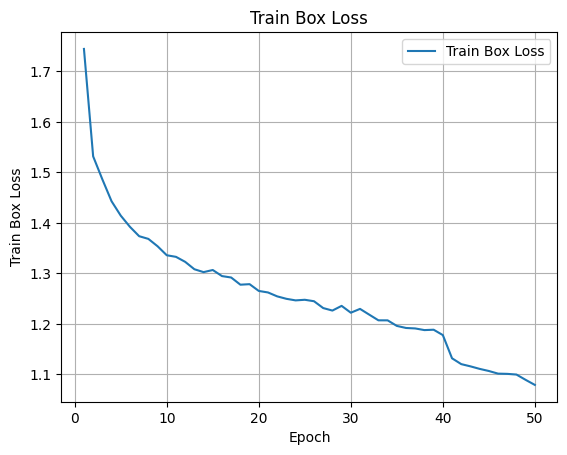

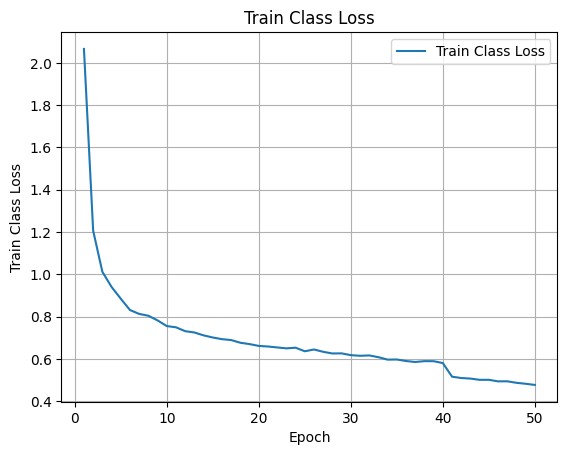

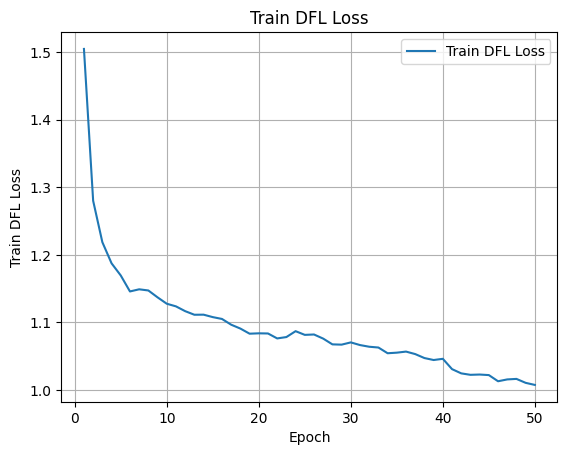

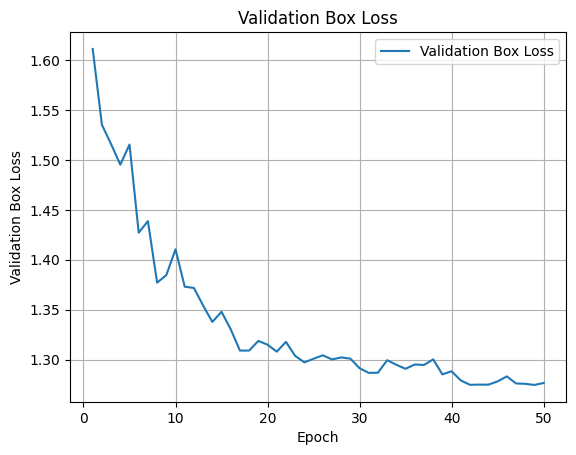

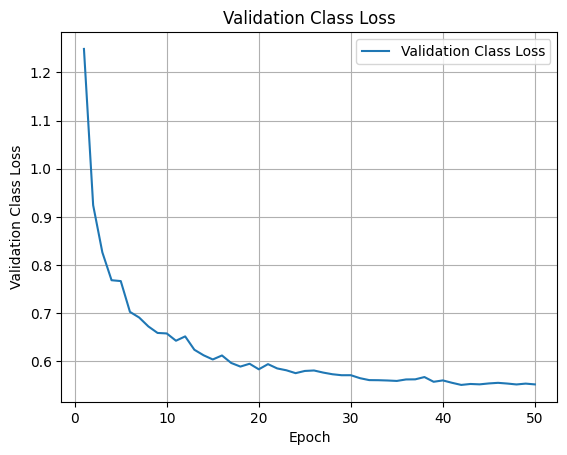

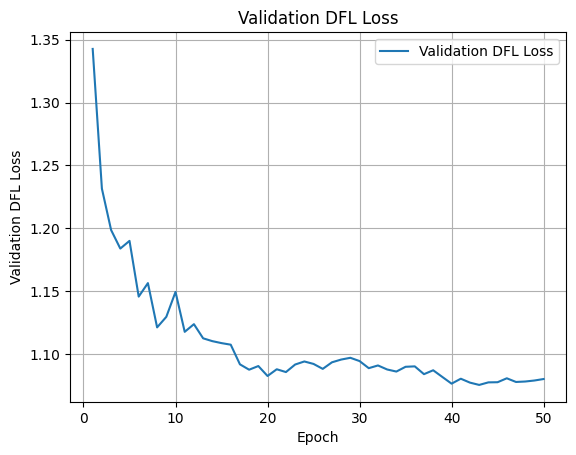

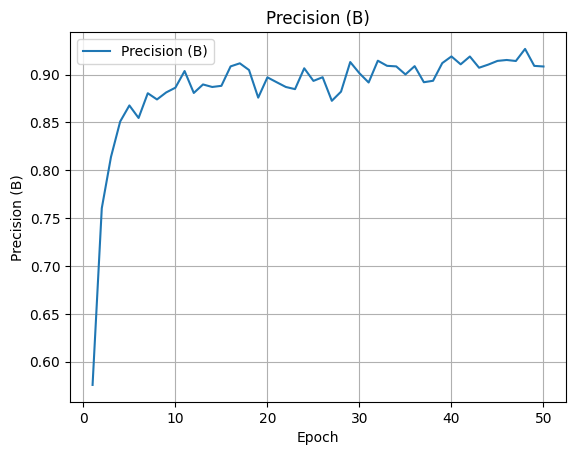

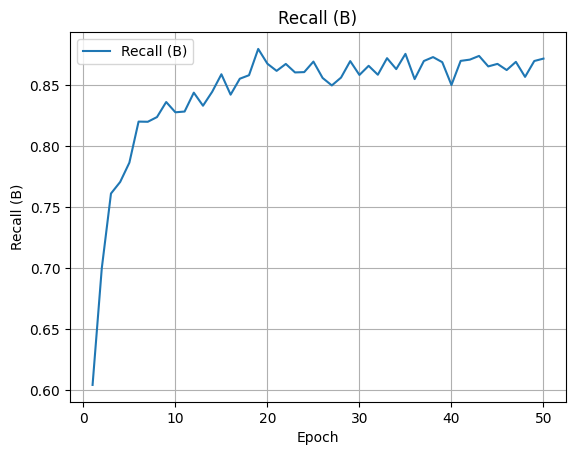

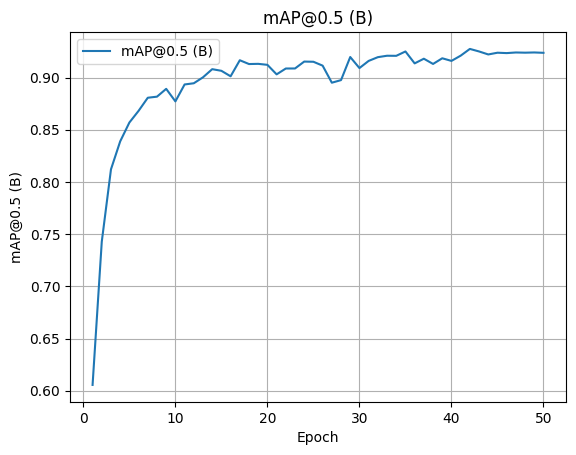

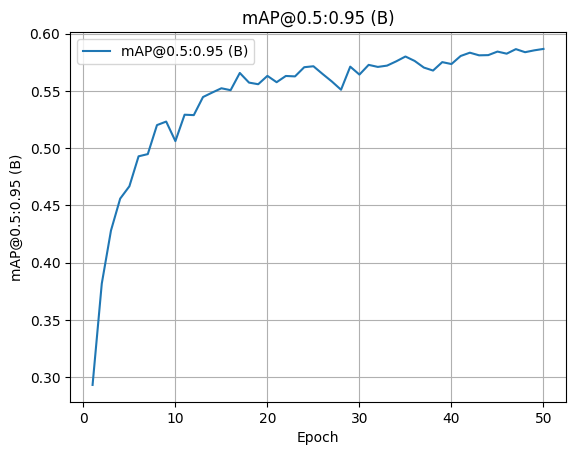


Final Metrics Summary (Last Epoch):
Train Box Loss: 1.0790
Train Class Loss: 0.4769
Train DFL Loss: 1.0073
Validation Box Loss: 1.2765
Validation Class Loss: 0.5524
Validation DFL Loss: 1.0801
Precision (B): 0.9084
Recall (B): 0.8716
mAP@0.5 (B): 0.9237
mAP@0.5:0.95 (B): 0.5866

Improvement Trends:
Train Box Loss: improved (Initial: 1.7447, Final: 1.0790)
Train Class Loss: improved (Initial: 2.0659, Final: 0.4769)
Train DFL Loss: improved (Initial: 1.5048, Final: 1.0073)
Validation Box Loss: improved (Initial: 1.6111, Final: 1.2765)
Validation Class Loss: improved (Initial: 1.2486, Final: 0.5524)
Validation DFL Loss: improved (Initial: 1.3427, Final: 1.0801)
Precision (B): worsened (Initial: 0.5758, Final: 0.9084)
Recall (B): worsened (Initial: 0.6042, Final: 0.8716)
mAP@0.5 (B): worsened (Initial: 0.6055, Final: 0.9237)
mAP@0.5:0.95 (B): worsened (Initial: 0.2932, Final: 0.5866)


In [9]:

try:
    result_metrics = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"File not found: {results_csv_path}")
    exit()


metrics = {
    "Train Box Loss": "train/box_loss",
    "Train Class Loss": "train/cls_loss",
    "Train DFL Loss": "train/dfl_loss",
    "Validation Box Loss": "val/box_loss",
    "Validation Class Loss": "val/cls_loss",
    "Validation DFL Loss": "val/dfl_loss",
    "Precision (B)": "metrics/precision(B)",
    "Recall (B)": "metrics/recall(B)",
    "mAP@0.5 (B)": "metrics/mAP50(B)",
    "mAP@0.5:0.95 (B)": "metrics/mAP50-95(B)",
}

%matplotlib inline

available_metrics = {name: col for name, col in metrics.items() if col in result_metrics.columns}
missing_metrics = [name for name in metrics if name not in available_metrics]

if missing_metrics:
    print(f"Missing metrics: {', '.join(missing_metrics)}")
else:
    print("All expected metrics are present.")

for metric_name, col in available_metrics.items():
    plt.figure()
    plt.plot(result_metrics["epoch"], result_metrics[col], label=metric_name)
    plt.title(metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

final_epoch = result_metrics.iloc[-1]
final_metrics = {name: final_epoch[col] for name, col in available_metrics.items()}

print("\nFinal Metrics Summary (Last Epoch):")
for name, value in final_metrics.items():
    print(f"{name}: {value:.4f}")

print("\nImprovement Trends:")
for metric_name, col in available_metrics.items():
    initial = result_metrics[col].iloc[0]
    final = result_metrics[col].iloc[-1]
    trend = "improved" if final < initial else "worsened"
    print(f"{metric_name}: {trend} (Initial: {initial:.4f}, Final: {final:.4f})")


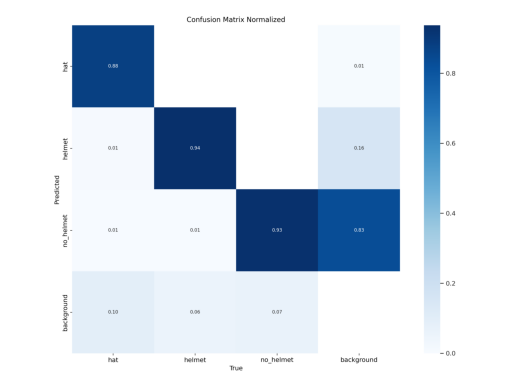

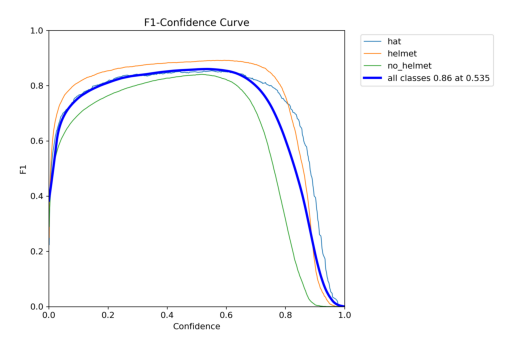

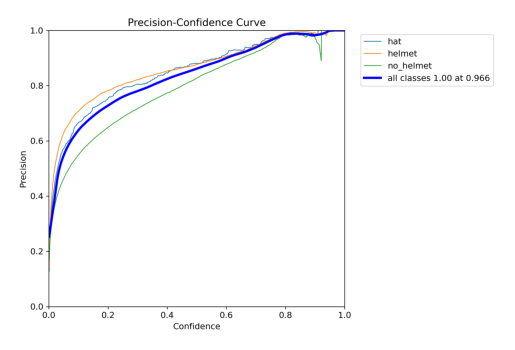

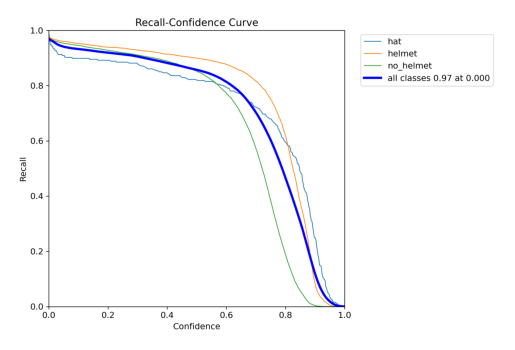

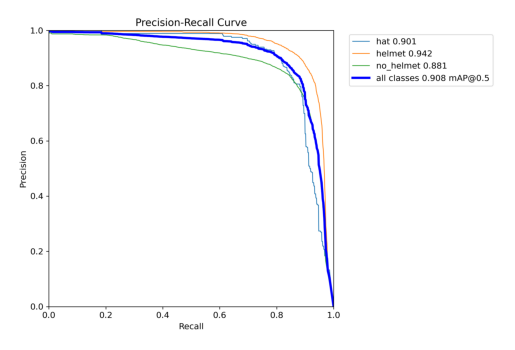

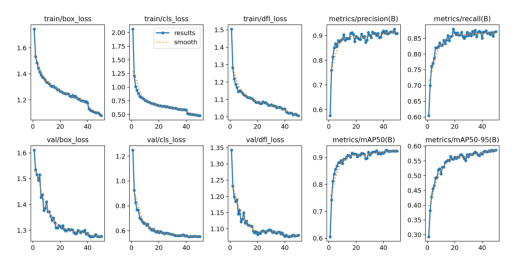

In [10]:


img = mpimg.imread(f"{file_path}/confusion_matrix_normalized.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/F1_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/P_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/R_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/PR_curve.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

img = mpimg.imread(f"{file_path}/results.png") 
plt.imshow(img)
plt.axis('off') 
plt.show()

